## Task:
Compare performance of K-Means and Gaussian Mixture Models on the Iris dataset

## Notebook Summary
* Load Iris dataset
* Cluster dataset by 4 features (sepal & petal length & width) using K-Means & GMMs (and combinations of parameters within the algorithms)
* Examine various metrics to evaluate 'goodness' of clustering (some metrics require truth; Others don't and use intrinsic measures)


In [1]:
# display output from all cmds just like Python shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import platform
print 'python.version = ', platform.python_version()
import IPython
print 'ipython.version =', IPython.version_info

import numpy as np
print 'numpy.version = ', np.__version__
import pandas as pd
print 'pandas.version = ', pd.__version__

import sklearn
print 'sklearn.version = ', sklearn.__version__

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
print 'matplotlib.version = ', matplotlib.__version__
import matplotlib.pyplot as plt

import seaborn as sns
print 'seaborn.version = ', sns.__version__

from sklearn import datasets as d
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import metrics


python.version =  2.7.10
ipython.version = (5, 1, 0, '')
numpy.version =  1.11.3
pandas.version =  0.19.2
sklearn.version =  0.18.1
matplotlib.version =  1.5.3
seaborn.version =  0.7.1


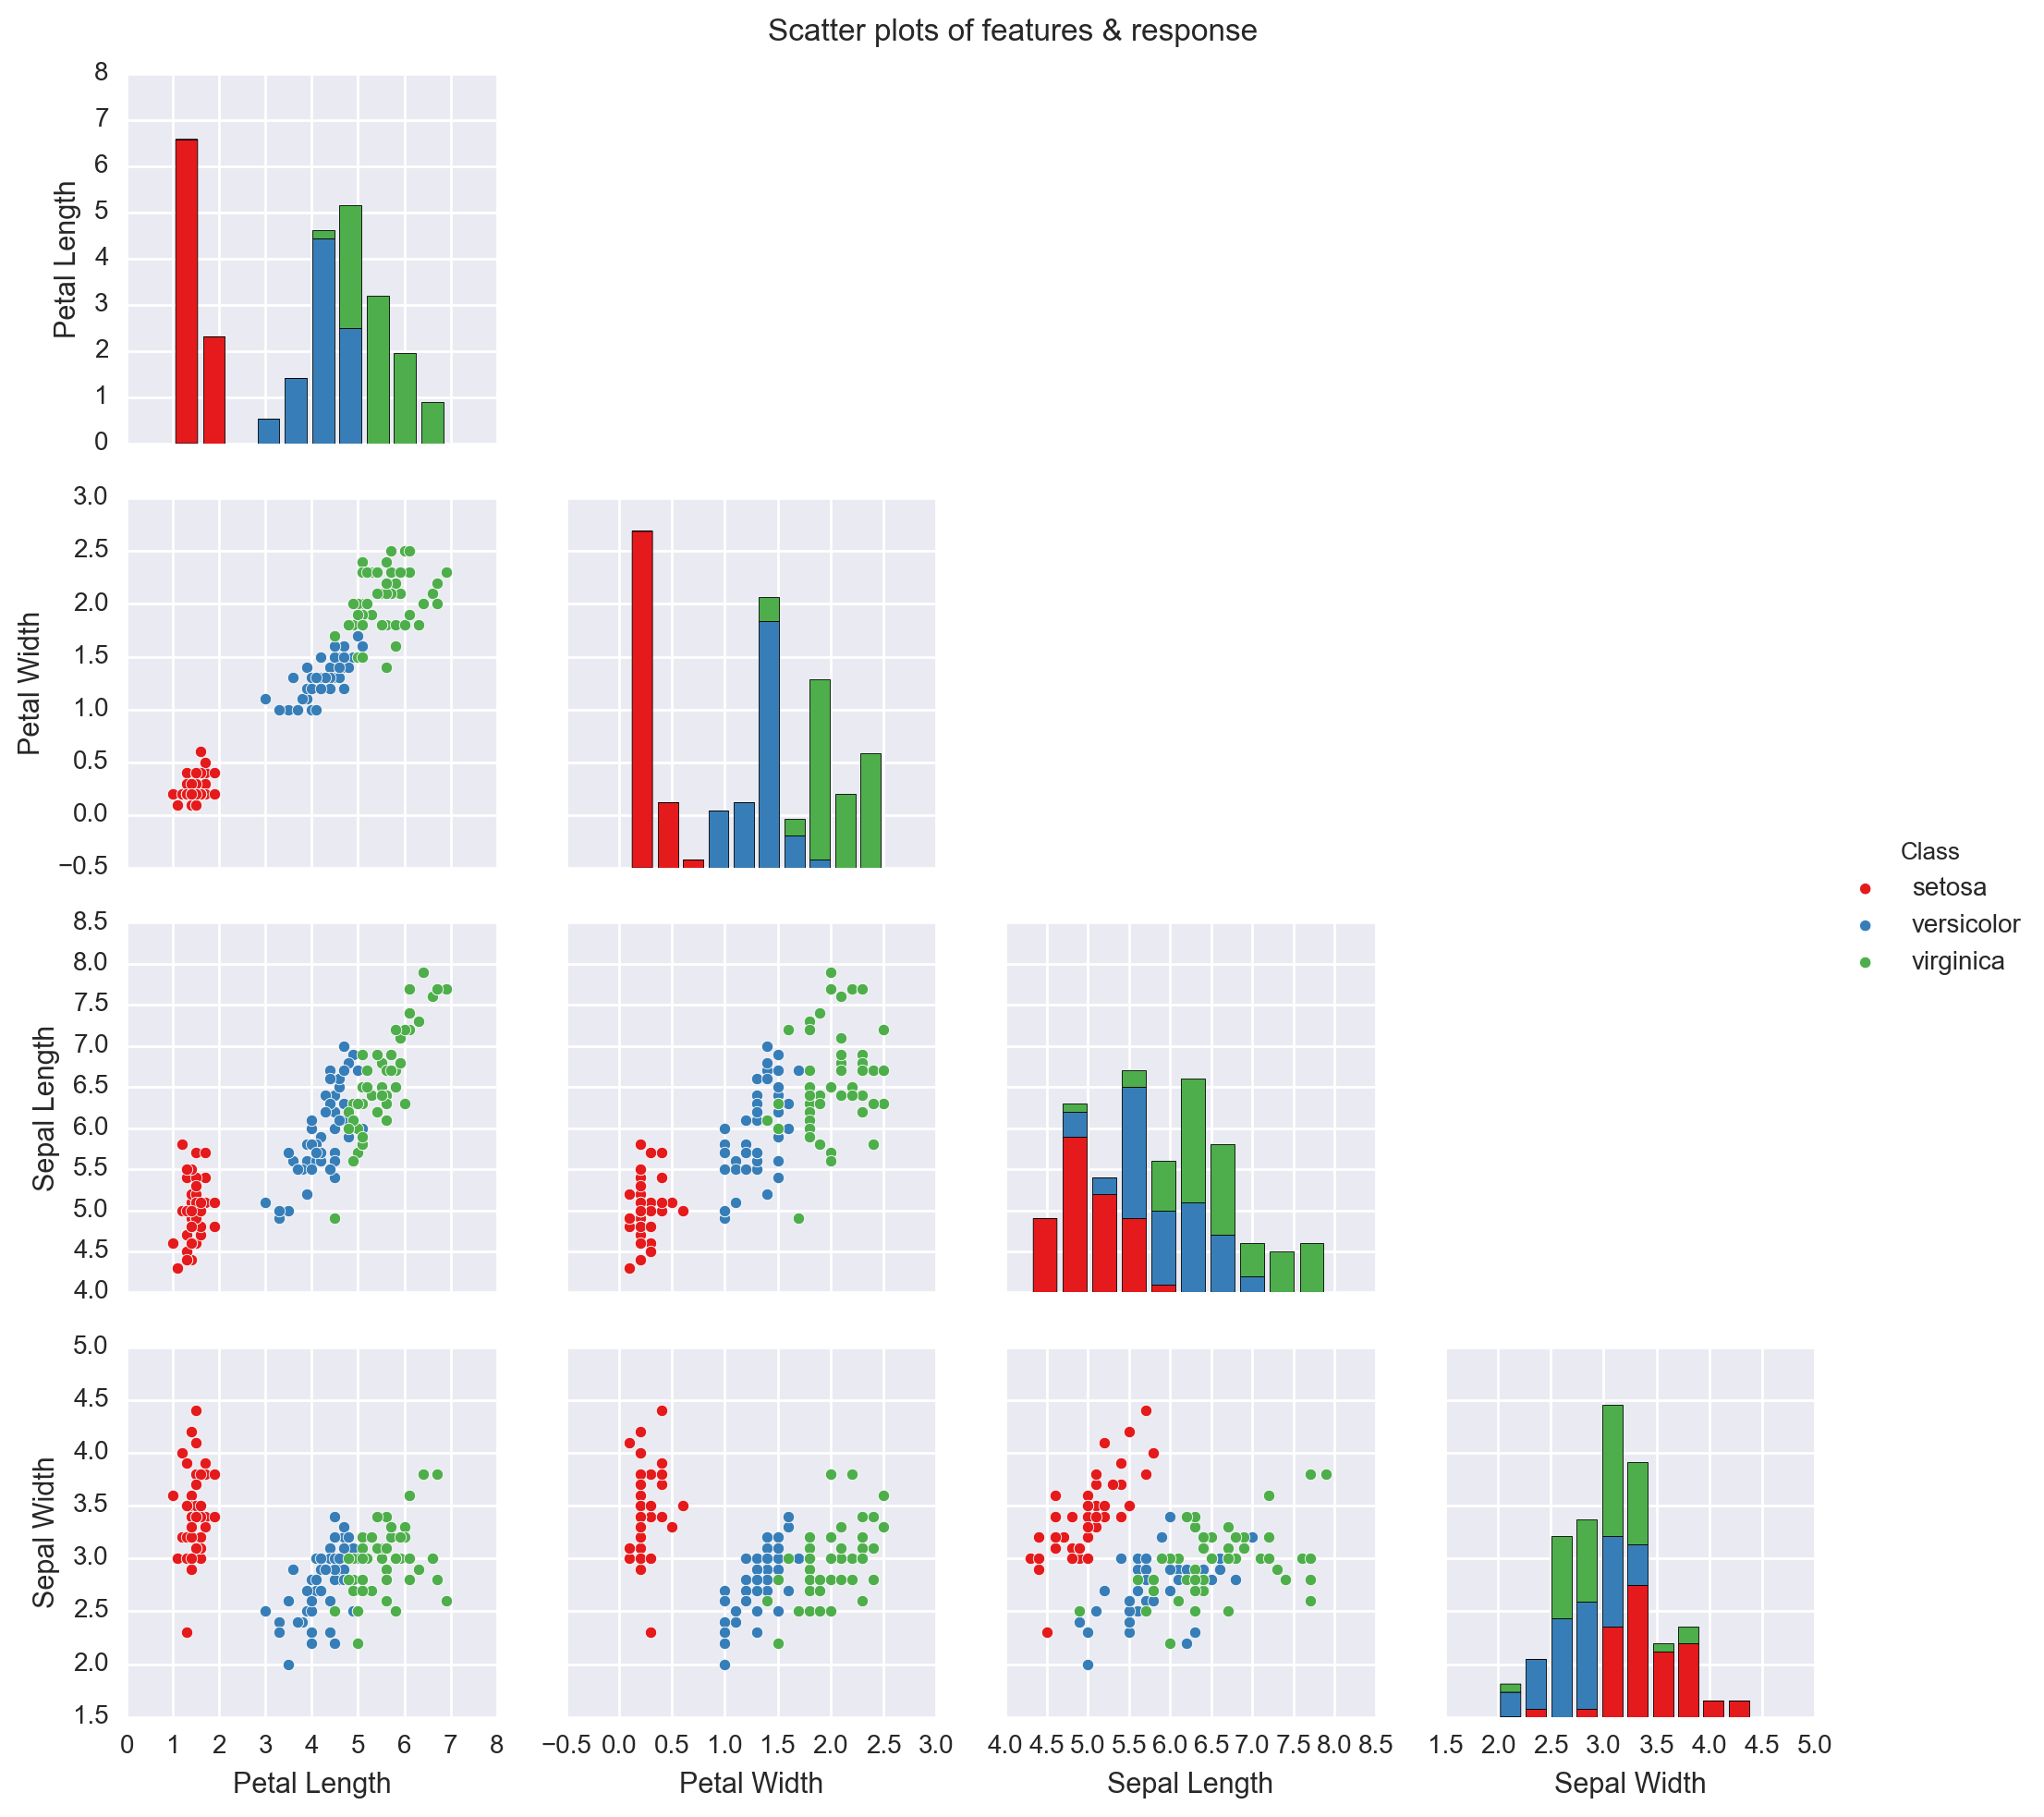

In [2]:
# ----------
# Load Iris dataset; perform EDA
# ----------

iris = d.load_iris()
X, y = iris.data, iris.target

df = pd.DataFrame({
        'Sepal Length': X[:,0],
        'Sepal Width': X[:,1],
        'Petal Length': X[:,2],
        'Petal Width': X[:,3],
        'Class': y
    })

df.replace({'Class': {
            0:'setosa',
            1: 'versicolor',
            2: 'virginica'
        }}, inplace=True)

g = sns.pairplot(df, hue='Class', palette='Set1');
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i,j].set_visible(False)

plt.subplots_adjust(top=0.95)
g.fig.suptitle('Scatter plots of features & response');


In [3]:
# ----------
# Cluster data with various algorithms
# ----------

algorithms = []
labels = []
kmeans_estimators = []

# K-Means
print 'Processing K-Means with various values of K'
for i in range(2,7):
    alg = 'KMeans-' + str(i)
    algorithms.append(alg)
    
    kmeans_estimator = KMeans(n_clusters=i).fit(X)
    labels.append(kmeans_estimator.labels_)
    kmeans_estimators.append(kmeans_estimator)

# Display various estimated attributes for KMeans estimator
# for attr in dir(kmeans_estimator):
#     if (not attr.startswith('_')) and attr.endswith('_'): 
#         print attr
#         print getattr(kmeans_estimator, attr),  '\n'


# GMMs
print 'Processing GMMs with various values of components'
for i in range(2,7):
    alg = 'GMM-' + str(i)
    algorithms.append(alg)
    
    gmm_estimator = GaussianMixture(n_components=i, n_init=10).fit(X)
    gmm_labels = gmm_estimator.predict(X)
    labels.append(gmm_labels)
 

Processing K-Means with various values of K
Processing GMMs with various values of components


In [4]:
# ----------
# Evaluate 'goodness' of clustering using various metrics
# ----------

clustering_metrics = pd.DataFrame(
                    index = [
                             'Adj Rand Index', 
                             'Mutual Info Score', 'Adj Mutual Info Score', 'Normalized Mutual Info Score', 
                             'Homogeneity Score', 'Completeness Score', 'V-Measure',
                             'F-M Score',
                             'Inertia', 'Silhouette Score', 'Calinski-Harabaz Score'
                            ],
                    columns = algorithms)

for pred_labels, alg in zip(labels, algorithms):
    # Clustering metrics that require known truth
    clustering_metrics[alg]['Adj Rand Index'] = format(round(metrics.adjusted_rand_score(y, pred_labels),3))
    clustering_metrics[alg]['Mutual Info Score'] = round(metrics.mutual_info_score(y, pred_labels),3)
    clustering_metrics[alg]['Adj Mutual Info Score'] = round(metrics.adjusted_mutual_info_score(y, pred_labels),3)
    clustering_metrics[alg]['Normalized Mutual Info Score'] = round(metrics.normalized_mutual_info_score(y, pred_labels),3)
    clustering_metrics[alg]['Homogeneity Score'] = round(metrics.homogeneity_score(y, pred_labels),3)
    clustering_metrics[alg]['Completeness Score'] = round(metrics.completeness_score(y, pred_labels),3)
    clustering_metrics[alg]['V-Measure'] = round(metrics.v_measure_score(y, pred_labels),3)
    clustering_metrics[alg]['F-M Score'] =  round(metrics.fowlkes_mallows_score(y, pred_labels),3)

    # Metrics that don't require truth to be known
    clustering_metrics[alg]['Silhouette Score'] = round(metrics.silhouette_score(X, pred_labels),3)
    clustering_metrics[alg]['Calinski-Harabaz Score'] = round(metrics.calinski_harabaz_score(X, pred_labels),3)

print 'Clustering metrics on training set data:'
clustering_metrics


inertia = pd.DataFrame(
            index = ['Inertia'],
            columns = algorithms)

for est, alg in zip(kmeans_estimators, algorithms):
    if alg.startswith('KMeans'):
        inertia[alg]['Inertia'] = est.inertia_

print 'Inertia for K-Means estimators:'
inertia

Clustering metrics on training set data:


,KMeans-2,KMeans-3,KMeans-4,KMeans-5,KMeans-6,GMM-2,GMM-3,GMM-4,GMM-5,GMM-6
Adj Rand Index,0.54,0.73,0.65,0.608,0.453,0.568,0.904,0.779,0.77,0.649
Mutual Info Score,0.574,0.826,0.888,0.905,0.913,0.637,0.987,0.982,0.975,1.026
Adj Mutual Info Score,0.519,0.748,0.647,0.592,0.513,0.577,0.897,0.722,0.684,0.618
Normalized Mutual Info Score,0.679,0.758,0.726,0.703,0.659,0.761,0.9,0.806,0.783,0.765
Homogeneity Score,0.522,0.751,0.808,0.824,0.831,0.579,0.898,0.894,0.888,0.934
Completeness Score,0.884,0.765,0.652,0.599,0.522,1,0.901,0.726,0.691,0.626
V-Measure,0.657,0.758,0.722,0.694,0.641,0.734,0.9,0.801,0.777,0.75
F-M Score,0.75,0.821,0.757,0.725,0.607,0.771,0.936,0.849,0.843,0.757
Inertia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Silhouette Score,0.681,0.553,0.498,0.489,0.37,0.686,0.501,0.376,0.382,0.24


Inertia for K-Means estimators:


,KMeans-2,KMeans-3,KMeans-4,KMeans-5,KMeans-6,GMM-2,GMM-3,GMM-4,GMM-5,GMM-6
Inertia,152.369,78.9408,57.3179,46.5356,38.9648,NaN,NaN,NaN,NaN,NaN
